## Classification Algorithms

### 1. Data Cleaning

In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
income_data = pd.read_csv("income_evaluation (1).csv")
df = income_data.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [172]:
# check column names
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [173]:
# remove whitespaces from the column names
df.columns = df.columns.str.strip()

In [174]:
# re-check column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [175]:
print("number of columns: ", df.shape[1])
print("number of rows: ", df.shape[0])

number of columns:  15
number of rows:  32561


In [176]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [177]:
# Check unique values count
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [178]:
# check duplicates
df.duplicated().sum()

np.int64(24)

In [179]:
# 23 duplicate value. Let's observe them
df[df.duplicated() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [180]:
# These are the duplicate values. duplicated() function shows only the first occurence and exclude the duplicates. 
# To show all duplicate rows without excluding first or any, we can use the following code
df[df.duplicated(keep=False)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [181]:
# Drop these duplicated rows
df.drop_duplicates(inplace=True)

In [182]:
df.duplicated().sum()

np.int64(0)

In [184]:
# check missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [187]:
df["education-num"] = df["education-num"].astype(object)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  object
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.0+ MB


### 2. Numerical columns

<div style = "font-size:20px">

**Scaling** is important in machine learning models, especially in the distance-based algorithms. Because, if the scales (or ranges) are absolutely different from each other, the models get confused and think the large scaled features as more important. For example, age has range (18-100) and income has range (9-100000). Here, distance based algorithms  (KNN, SVM and etc.) will think income as more important feature and will give it more weight. 

**Distance-based models** (KNN, SVM), **Gradient-based models** (Logistic Regression, Linear Regression) and **Neural Networks** require scaling. 
**Decision Tree** and **Naive Bayes** do not require scaling. 

**Scaling** is the general term for adjusting the ranges of variables. **Normalization** and **Standardization** are two types of scaling methods.

**Standardization** - converts the range of variables, so that they will have zero mean ($\mu=0$) and 1 standard deviation ($\sigma = 1$). The values more than $3 \sigma$ and less than $-3\sigma$ is considered as outliers. 
$$z = \frac {x-\mu} {\sigma} $$

**Normalization** - scales the features to the fixed range of [0,1]. It preserves the relationships between values but compresses it in the small range. But it is sensitive to outliers, because if you have more outliers or extreme values, the actual normal data will be squezed too much. 
$$x' = \frac {x - x_{min}} {x_{max} - x_{min}}$$


**More Robust Scaling methods**

**Robust scaler** - uses median and interquartile range (IQR) instead of mean and standard deviation. Therefore, it is not sensitive to outliers,  as median is not as sensitive as mean to the outler/extreme values. This method shifts the median to 0 and scales IQR to 1. 
$$x' = \frac {x - \text{median}(x)} {\text{IQR}(x)}$$

**Quantile Transformer / Rank-based scaling** - maps the data to a uniform or normal distribution using feature ranks. This method transforms each feature so that its percentiles are evenly spaced. It is very robust to outliers. 


**Log transform** -  is better choice and effective for highly skewed features. It compresses large values and expands small values. But the limit is that it works only on positive values. 
$$x' = log (x+1) $$

**When to use which one?:**
- mostly normal distribution, no extreme outliers: **standardization (z-score)**. Because it keeps mean=0, variance=1, perfect for distance-based and gradient-based models
- highly skewed, few extreme outliers:  **log transform first, then standardization**.  Because compresses extreme values, stabilizes variance, makes models learn better.
- Extremely skewed or unknown distribution, outliers present: **quantile transformer**. Because it reduces skew, brings all features to similar distribution, robust for ML.
- Features that need to be in fixed range: **min-max normalization**
</div>

In [189]:
# Before applying scaling to the variables, lets firstly see the descriptive stats of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


<div style = "font-size:20px">
    
As is seen from the descriptive statistics of the numerical values, the ranges are very different from each other between the features. Therefore, scaling is must for better models. Before applying any scaling method, lets' visualize the distributions of data with **histograms** and **box-plots** 

</div>

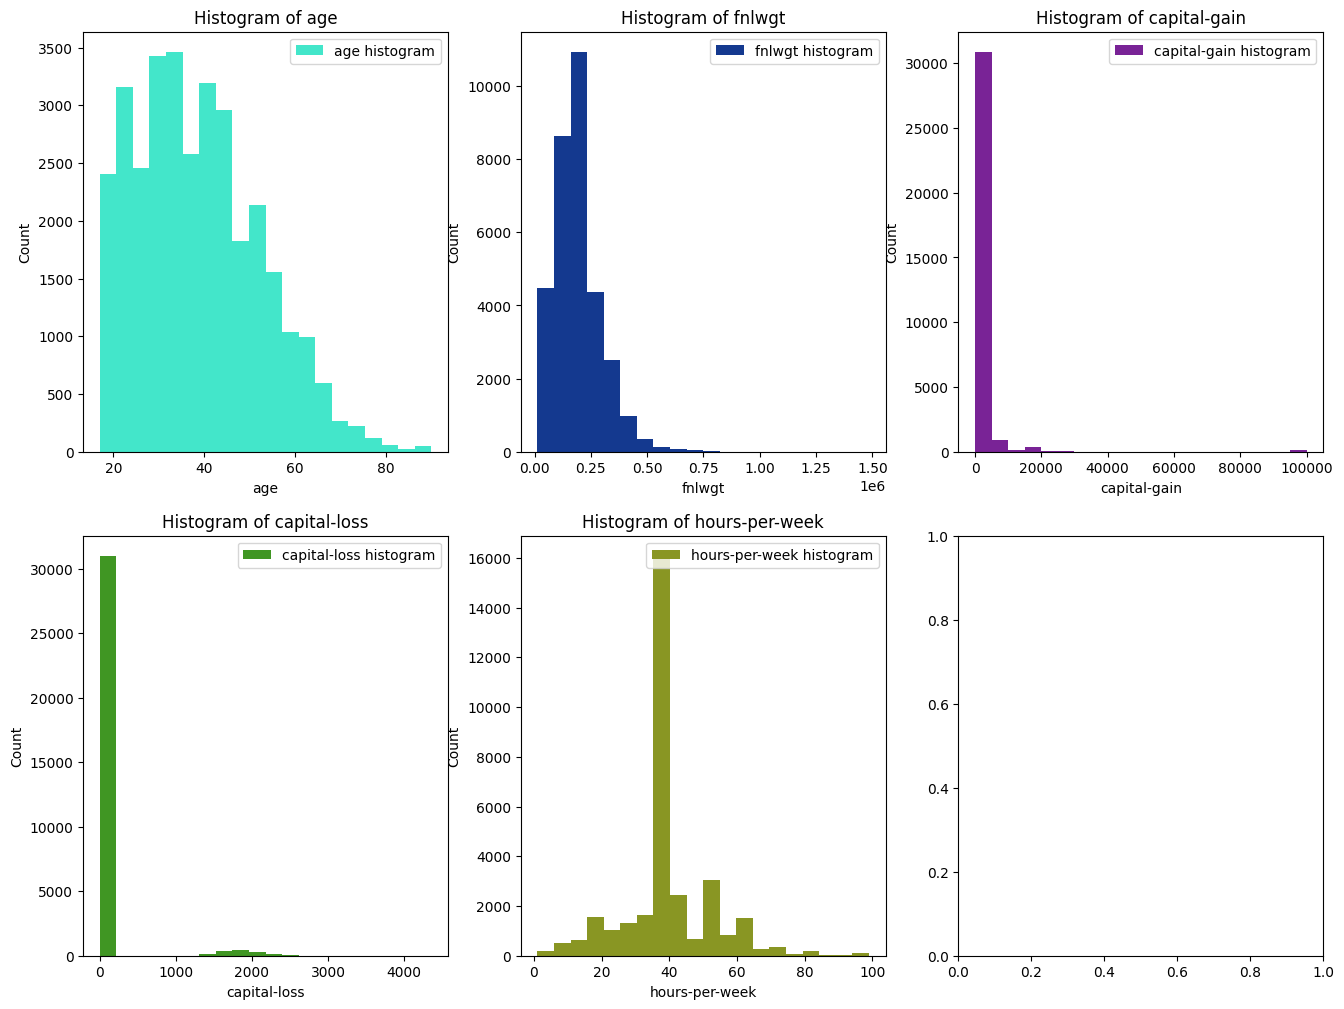

In [191]:
numeric_cols = df.select_dtypes(include='number').columns

fig,axes = plt.subplots(nrows=2, ncols=3, figsize = (16,12))
axes = axes.flatten()
colors = ["#43e6ca", "#14398f", "#792396", "#409623", "#899623","#000000"]
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col],bins=20,color=colors[i],label=f"{col} histogram")
    axes[i].legend()
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)
    axes[i].set_title(f"Histogram of {col}")
plt.show()
# plt.figure(figsize = (10,8))
# sns.histplot(df["age"],kde=True)

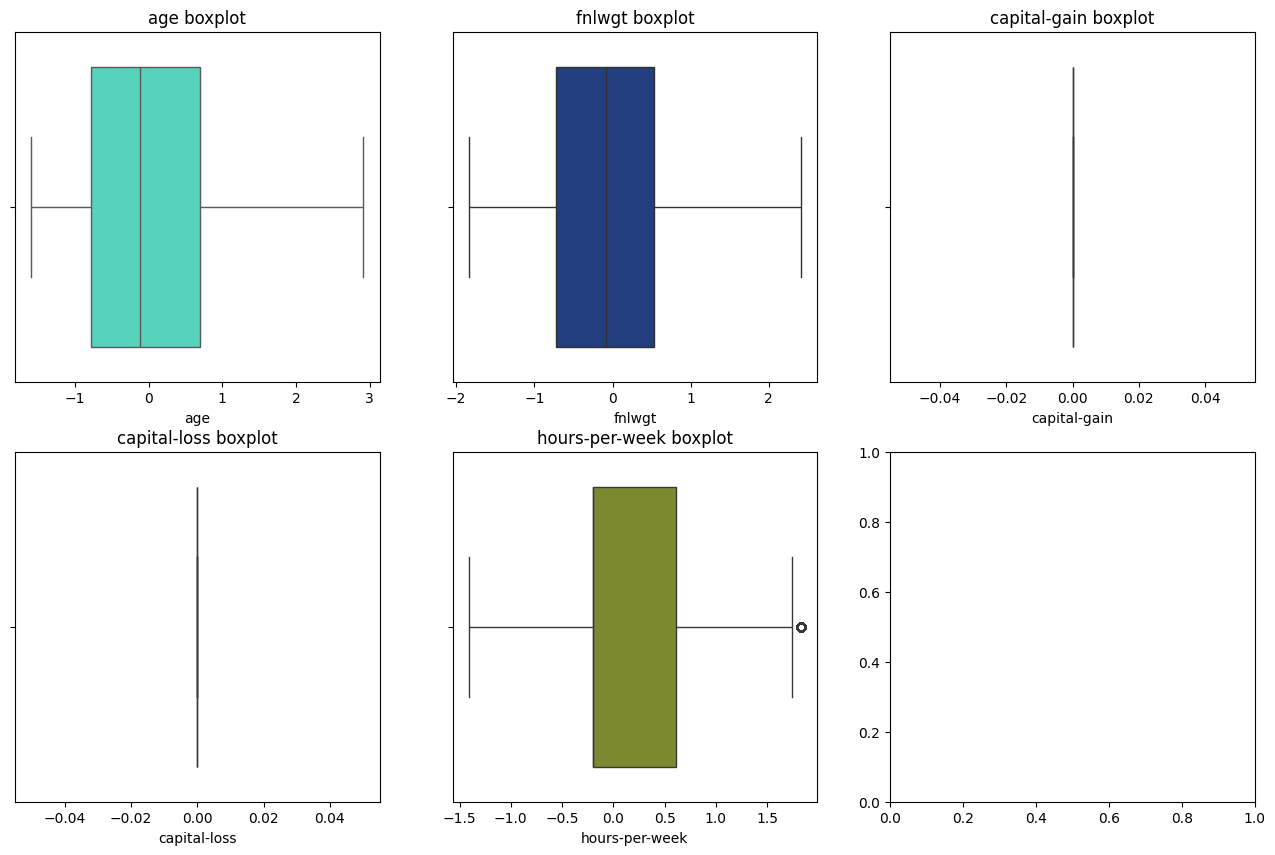

In [199]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
axes = axes.flatten()
colors = ["#43e6ca", "#14398f", "#792396", "#409623", "#899623","#000000"]
for i,col in enumerate(df.select_dtypes(include="number").columns):
    sns.boxplot(data = df, x=col, ax=axes[i], color = colors[i])
    axes[i].set_title(f"{col} boxplot")
plt.show()

In [193]:
def remove_outliers(col):
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return lower_bound, upper_bound

In [194]:
for col in df.select_dtypes(include="number").columns:
    lower, upper = remove_outliers(df[col])
    df[col] = np.clip(df[col], a_min = lower, a_max = upper)

In [195]:
from sklearn.preprocessing import StandardScaler 

In [196]:
scaler = StandardScaler()

In [197]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [198]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,3.253700e+04,3.253700e+04,32537.0,32537.0,3.253700e+04
mean,1.489351e-16,5.568688e-18,0.0,0.0,-2.292989e-16
std,1.000015e+00,1.000015e+00,0.0,0.0,1.000015e+00
min,-1.590589e+00,-1.835009e+00,0.0,0.0,-1.406640e+00
25%,-7.790584e-01,-7.254036e-01,0.0,0.0,-1.944716e-01
50%,-1.150790e-01,-8.903763e-02,0.0,0.0,-1.944716e-01
75%,6.964512e-01,5.274370e-01,0.0,0.0,6.136409e-01
max,2.909716e+00,2.406698e+00,0.0,0.0,1.825810e+00


In [201]:
df["education-num"] = df["education-num"].astype(int)

### 3. Categorical Variables 

In order to use the categorical variables in our model building, we should somehow convert them to numerical values. This proecess is called **encoding**. The categorical variables can be **nominal** (order does not matter) and **ordinal** (order is important). We should encode these variables differently, because in ordinal variables the order is must. Nominal variables can be ordered with the following two methods:
- **One hot encoding**: creates binary (True/False or 1/0) column for each category without dropping any of them. For example, you have  sex column with "Male"/"Female" categories; with One-hot encoding, two columns will be created with the corresponding names. If a person is man, then 1 will be written to Male column, otherwise 1 will be written to Female column.
- **Dummy variables**: it works as one-hot encoding, but the difference is one column is dropped. For sex column, if we apply dummy variables, we will have one column with the name Male. If it is 1, it means a person is male, if it is zero, it means person is female. If collinearity between variables is a problem for the model you should definitely use dummy variables.
- **Ordinal encoder**: encodes variables according to the order. For [example, small, medium] and high wlll be encoded as [0,1,2].

By using sklearn library we can apply all of these encodings. Let's apply encoding to our variables.

In [202]:
# let's see the categorical variables first 
df.select_dtypes(include="object")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [203]:
# let's see how many unique variables are there in each column
# if the number of unique variables is too much, we can not apply encoding. 
df.select_dtypes(include="object").nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
income             2
dtype: int64

In [204]:
# Find relations between categorical variables and target
# In order to find the relations between categorical variables, we should use Chi-Square tests
from scipy.stats import chi2_contingency

In [205]:
categoric_cols = df.select_dtypes(include="object").columns[:-1]
categoric_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [207]:
target = df.select_dtypes(include="object").columns[-1]
target

'income'

In [208]:
chitest_results = []

for col in categoric_cols:
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df[col], df[target]))

    chitest_results.append({"variable": col, "chi2": chi2, "p-value": p})

chitest_results = pd.DataFrame(chitest_results)

In [139]:
chitest_results = chitest_results.sort_values(by = "chi2", ascending = False)
chitest_results

,variable,chi2,p-value
4,relationship,6692.098803,0.000000e+00
2,marital-status,6510.332127,0.000000e+00
1,education,4428.404688,0.000000e+00
3,occupation,4030.209207,0.000000e+00
6,sex,1516.539711,0.000000e+00
0,workclass,1044.696157,3.352256e-220
5,race,330.943399,2.279787e-70
7,native-country,315.448537,4.833086e-44


According to the results, all variables have significant relationship with the target "income" variable. However, the larger the chi2 value means the larger relation, hence we can say "relationship", "marital_status", "education", "occupation" variables have more relation with target.

In [232]:
# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V
cramers_dict = {}
for col in categoric_cols:
    cramers_dict[col] = cramers_v(df[col], df[target])

# Convert to DataFrame for heatmap
cramers_df = pd.DataFrame(list(cramers_dict.items()), columns=['Feature', 'CramersV'])
cramers_df.sort_values(by="CramersV", ascending=False, inplace=True)
cramers_df = cramers_df.set_index('Feature')

KeyError: 'relationship'

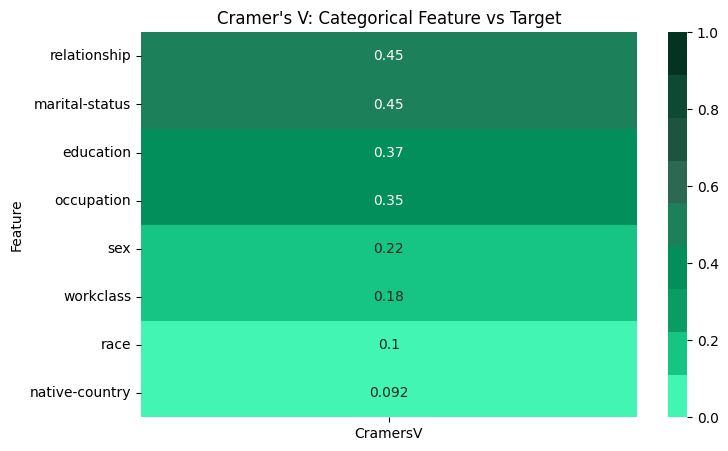

In [210]:
plt.figure(figsize=(8,5))
sns.heatmap(cramers_df, annot=True, cmap=["#42f5b3", "#16c484","#0b9c66","#038f5b", "#1c805b", "#2c6952", 
                                          "#1c543f", "#0d4a33", "#043322"], vmin=0, vmax=1)
plt.title("Cramer's V: Categorical Feature vs Target")
plt.show()


According to the results, we can see that the "relationship", "marital status", "education" and "occupation" affects the target variable, mostly. The interpretations are same with the Chi-test results.

Because of the results, we can tell all variables have significant relationship with target, but some of these categorical variables have too many unique values to encode. If the variable has too many unique values, we will not be able to encode it using dummy or onehotencoding, because it will create lots of columns and make the size bigger. Hence, we should choose the columns with less unique values to encode and drop the remaining.

#### Occupation variable

In [211]:
df.select_dtypes(include="object").nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
income             2
dtype: int64

There are too many unique values for Occupation. We should decrease the number of unique values inside this column by grouping. Let's first observe how many values are there in each occupation.

In [212]:
df["occupation"].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

We can group the occupation categories with the following way:
- Professional/White Collar jobs
- Clerical/Administrative jobs
- Skilled blue-collar / Craft jobs
- Service-related jobs
- Agricultural jobs

In [213]:
# Clean the occupation column
df["occupation"] = df["occupation"].str.strip().str.lower()

# Create mapping in lowercase
occupation_map = {
    "prof-specialty":"prof_white_collar", 
    "exec-managerial": "prof_white_collar",
    "tech-support": "prof_white_collar",

    "adm-clerical": "clerical_administrative",
    "sales": "clerical_administrative", 
    
    "craft-repair": "skilled_blue_collar",
    "machine-op-inspct": "skilled_blue_collar",
    "transport-moving": "skilled_blue_collar",
    "handlers-cleaners": "skilled_blue_collar",
    
    "other-service": "service",
    "protective-serv": "service",
    "priv-house-serv": "service",
    "armed-forces": "service",
    "?": "service",
    
    "farming-fishing": "agricultural"
}

# Replace
df["occupation_groups"] = df["occupation"].replace(occupation_map)

df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_groups
0,0.032472,State-gov,-1.149209,Bachelors,13,Never-married,adm-clerical,Not-in-family,White,Male,0.0,0.0,-0.194472,United-States,<=50K,clerical_administrative
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,13,Married-civ-spouse,exec-managerial,Husband,White,Male,0.0,0.0,-1.406640,United-States,<=50K,prof_white_collar
2,-0.041304,Private,0.303007,HS-grad,9,Divorced,handlers-cleaners,Not-in-family,White,Male,0.0,0.0,-0.194472,United-States,<=50K,skilled_blue_collar
3,1.065329,Private,0.503550,11th,7,Married-civ-spouse,handlers-cleaners,Husband,Black,Male,0.0,0.0,-0.194472,United-States,<=50K,skilled_blue_collar
4,-0.779058,Private,1.593665,Bachelors,13,Married-civ-spouse,prof-specialty,Wife,Black,Female,0.0,0.0,-0.194472,Cuba,<=50K,prof_white_collar


In [214]:
df["occupation_groups"].value_counts()

occupation_groups
prof_white_collar          9128
skilled_blue_collar        9060
clerical_administrative    7418
service                    5939
agricultural                992
Name: count, dtype: int64

#### Marital Status variable

In [215]:
df[["marital-status"]].value_counts()

marital-status       
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [216]:
df["marital-status"] = df["marital-status"].str.strip().str.lower()

marital_map = {
    "married-civ-spouse": "married", 
    "married-spouse-absent": "married", 
    "married-af-spouse": "married", 

    "never-married": "single",

    "divorced": "divorced-widowed", 
    "separated": "divorced-widowed", 
    "widowed": "divorced-widowed"
}

In [217]:
df["marital_status"] = df["marital-status"].map(marital_map)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_groups,marital_status
0,0.032472,State-gov,-1.149209,Bachelors,13,never-married,adm-clerical,Not-in-family,White,Male,0.0,0.0,-0.194472,United-States,<=50K,clerical_administrative,single
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,13,married-civ-spouse,exec-managerial,Husband,White,Male,0.0,0.0,-1.406640,United-States,<=50K,prof_white_collar,married
2,-0.041304,Private,0.303007,HS-grad,9,divorced,handlers-cleaners,Not-in-family,White,Male,0.0,0.0,-0.194472,United-States,<=50K,skilled_blue_collar,divorced-widowed
3,1.065329,Private,0.503550,11th,7,married-civ-spouse,handlers-cleaners,Husband,Black,Male,0.0,0.0,-0.194472,United-States,<=50K,skilled_blue_collar,married
4,-0.779058,Private,1.593665,Bachelors,13,married-civ-spouse,prof-specialty,Wife,Black,Female,0.0,0.0,-0.194472,Cuba,<=50K,prof_white_collar,married


In [218]:
df["marital_status"].value_counts()

marital_status
married             15411
single              10667
divorced-widowed     6459
Name: count, dtype: int64

#### Relationship variable

In [219]:
df["relationship"].value_counts()

relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

Relationship is almost identical to marital status. Therefore, drop it.

In [220]:
df.drop("relationship", axis=1,inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_groups,marital_status
0,0.032472,State-gov,-1.149209,Bachelors,13,never-married,adm-clerical,White,Male,0.0,0.0,-0.194472,United-States,<=50K,clerical_administrative,single
1,0.844002,Self-emp-not-inc,-1.088284,Bachelors,13,married-civ-spouse,exec-managerial,White,Male,0.0,0.0,-1.406640,United-States,<=50K,prof_white_collar,married
2,-0.041304,Private,0.303007,HS-grad,9,divorced,handlers-cleaners,White,Male,0.0,0.0,-0.194472,United-States,<=50K,skilled_blue_collar,divorced-widowed
3,1.065329,Private,0.503550,11th,7,married-civ-spouse,handlers-cleaners,Black,Male,0.0,0.0,-0.194472,United-States,<=50K,skilled_blue_collar,married
4,-0.779058,Private,1.593665,Bachelors,13,married-civ-spouse,prof-specialty,Black,Female,0.0,0.0,-0.194472,Cuba,<=50K,prof_white_collar,married


#### Workclass

In [221]:
df["workclass"].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

We can group these: private_sector, self_employed, "gov_jobs", "other"

In [222]:
df["workclass"] = df["workclass"].str.strip().str.lower()

workclass_map = {
    "private": "private-sector", 

    "self-emp-not-inc": "self_employed",
    "self-emp-inc": "self_employed", 

    "local-gov" : "gov_jobs",
    "state-gov": "gov_jobs",
    "federal-gov": "gov_jobs",

    "?": "other_unemployed", 
    "without-pay": "other_unemployed",
    "never-worked": "other_unemployed"
}

In [223]:
df["workclass_groups"] = df["workclass"].map(workclass_map)

df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_groups,marital_status,workclass_groups
0,0.032472,state-gov,-1.149209,Bachelors,13,never-married,adm-clerical,White,Male,0.0,0.0,-0.194472,United-States,<=50K,clerical_administrative,single,gov_jobs
1,0.844002,self-emp-not-inc,-1.088284,Bachelors,13,married-civ-spouse,exec-managerial,White,Male,0.0,0.0,-1.406640,United-States,<=50K,prof_white_collar,married,self_employed


In [224]:
df["workclass_groups"].value_counts()

workclass_groups
private-sector      22673
gov_jobs             4351
self_employed        3656
other_unemployed     1857
Name: count, dtype: int64

#### Race category

In [225]:
df["race"].value_counts()

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [226]:
df["race"] = df["race"].str.strip().str.lower()
race_map = {
    "white": "white",
    "black": "black", 
    "asian-pac-islander": "asian", 
    "amer-indian-eskimo" : "other", 
    "other": "other"
}
df["races"] = df["race"].map(race_map)
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_groups,marital_status,workclass_groups,races
0,0.032472,state-gov,-1.149209,Bachelors,13,never-married,adm-clerical,white,Male,0.0,0.0,-0.194472,United-States,<=50K,clerical_administrative,single,gov_jobs,white
1,0.844002,self-emp-not-inc,-1.088284,Bachelors,13,married-civ-spouse,exec-managerial,white,Male,0.0,0.0,-1.406640,United-States,<=50K,prof_white_collar,married,self_employed,white


#### Native country

There are lots of unique countries in this column, therefore we can not simply group and encode this variable. So, drop it.

In [227]:
df.drop("native-country", axis=1,inplace=True)

In [228]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income,occupation_groups,marital_status,workclass_groups,races
0,0.032472,state-gov,-1.149209,Bachelors,13,never-married,adm-clerical,white,Male,0.0,0.0,-0.194472,<=50K,clerical_administrative,single,gov_jobs,white
1,0.844002,self-emp-not-inc,-1.088284,Bachelors,13,married-civ-spouse,exec-managerial,white,Male,0.0,0.0,-1.406640,<=50K,prof_white_collar,married,self_employed,white


#### Encode All Categorical variables

In [229]:
columns_for_encoding = ["occupation_groups", "marital_status", "workclass_groups", "races", "sex"]

In [234]:
df = pd.get_dummies(df, columns=columns_for_encoding, drop_first=True, dtype=int)


In [235]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,capital-gain,capital-loss,...,occupation_groups_skilled_blue_collar,marital_status_married,marital_status_single,workclass_groups_other_unemployed,workclass_groups_private-sector,workclass_groups_self_employed,races_black,races_other,races_white,sex_ Male
0,0.032472,state-gov,-1.149209,Bachelors,13,never-married,adm-clerical,white,0.0,0.0,...,0,0,1,0,0,0,0,0,1,1
1,0.844002,self-emp-not-inc,-1.088284,Bachelors,13,married-civ-spouse,exec-managerial,white,0.0,0.0,...,0,1,0,0,0,1,0,0,1,1


After encoding we can drop the actual columns

In [237]:
df.drop(["workclass","marital-status","occupation","race"],axis=1, inplace=True)

In [238]:
df.head(2)

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,income,occupation_groups_clerical_administrative,occupation_groups_prof_white_collar,...,occupation_groups_skilled_blue_collar,marital_status_married,marital_status_single,workclass_groups_other_unemployed,workclass_groups_private-sector,workclass_groups_self_employed,races_black,races_other,races_white,sex_ Male
0,0.032472,-1.149209,Bachelors,13,0.0,0.0,-0.194472,<=50K,1,0,...,0,0,1,0,0,0,0,0,1,1
1,0.844002,-1.088284,Bachelors,13,0.0,0.0,-1.406640,<=50K,0,1,...,0,1,0,0,0,1,0,0,1,1


### Prepare data for modelling

In [241]:
from sklearn.model_selection import train_test_split

In [280]:
X = df.drop(["income","education"],axis=1)
y = df["income"].str.strip().apply(lambda x: 1 if x in [">=50K", ">50K"] else 0)

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True,
                                                   random_state=111)

### Logistic Regression

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_auc_score, roc_curve

In [369]:
LogReg = LogisticRegression(max_iter=1000)

In [370]:
LogReg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [371]:
y_pred = LogReg.predict(X_test)

In [372]:
y_prob = LogReg.predict_proba(X_test)[:,1]

In [373]:
y_prob

array([0.02765277, 0.20462111, 0.01171071, ..., 0.01156077, 0.85849319,
       0.02269316])

<font size = 5> Evaluate the model

In [374]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [375]:
indexes = ["Accuracy", "Precision", "Recall", "ROC&AUC"]
results_logreg = [accuracy, precision, recall, roc_auc]

In [376]:
results = pd.DataFrame(data = results_logreg, index = indexes, columns = ["Logistic Regression"])
results

,Logistic Regression
Accuracy,0.833282
Precision,0.692997
Recall,0.545863
ROC&AUC,0.883947


In [377]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot = {"LogReg": [fpr,tpr]}

### Naive Bayes

In [378]:
from sklearn.naive_bayes import GaussianNB

In [379]:
nb = GaussianNB()

In [380]:
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [381]:
y_pred = nb.predict(X_test)

In [382]:
y_prob = nb.predict_proba(X_test)[:,1]

In [383]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [384]:
results["Naive Bayes"] = [accuracy,precision, recall, roc_auc]
results

,Logistic Regression,Naive Bayes
Accuracy,0.833282,0.744007
Precision,0.692997,0.479572
Recall,0.545863,0.805645
ROC&AUC,0.883947,0.841494


In [386]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

results_for_plot["NaiveBayes"] = [fpr,tpr]

### KNN

In [387]:
from sklearn.neighbors import KNeighborsClassifier

In [388]:
knn = KNeighborsClassifier()

In [389]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [390]:
y_pred = knn.predict(X_test)

In [391]:
y_prob = knn.predict_proba(X_test)[:,1]

In [395]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_prob )

In [396]:
results["KNN"] = [accuracy,precision,recall,roc_auc]
results

,Logistic Regression,Naive Bayes,KNN
Accuracy,0.833282,0.744007,0.814075
Precision,0.692997,0.479572,0.623322
Recall,0.545863,0.805645,0.565747
ROC&AUC,0.883947,0.841494,0.838519


In [397]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
results_for_plot["KNN"] = [fpr,tpr]


### SVM 

In [398]:
from sklearn.svm import SVC

In [399]:
svm = SVC(probability=True)

In [400]:
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [401]:
y_pred = svm.predict(X_test)

In [402]:
y_prob = svm.predict_proba(X_test)[:,1]

In [403]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [404]:
results["SVM"] = [accuracy,precision,recall,roc_auc]
results

,Logistic Regression,Naive Bayes,KNN,SVM
Accuracy,0.833282,0.744007,0.814075,0.832207
Precision,0.692997,0.479572,0.623322,0.720908
Recall,0.545863,0.805645,0.565747,0.488775
ROC&AUC,0.883947,0.841494,0.838519,0.880059


In [405]:
fpr,tpr, thresholds = roc_curve(y_test, y_prob)

In [406]:
results_for_plot["SVM"] = [fpr,tpr]

### Decision Tree

In [407]:
from sklearn.tree import DecisionTreeClassifier

In [408]:
dtree = DecisionTreeClassifier(max_depth=11, random_state=111)

In [409]:
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,111
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [410]:
y_pred = dtree.predict(X_test)

In [411]:
y_prob = dtree.predict_proba(X_test)[:,1]

In [412]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [413]:
results["Decision Tree"] = [accuracy, precision, recall, roc_auc]
results

,Logistic Regression,Naive Bayes,KNN,SVM,Decision Tree
Accuracy,0.833282,0.744007,0.814075,0.832207,0.818685
Precision,0.692997,0.479572,0.623322,0.720908,0.647471
Recall,0.545863,0.805645,0.565747,0.488775,0.533675
ROC&AUC,0.883947,0.841494,0.838519,0.880059,0.834873


In [414]:
fpr,tpr, thresholds = roc_curve(y_test,y_prob)

In [415]:
results_for_plot["DTree"] = [fpr,tpr]

### Random Forest

In [416]:
from sklearn.ensemble import RandomForestClassifier

In [417]:
randfor = RandomForestClassifier(n_estimators=100,max_depth=11,random_state=111)

In [418]:
randfor.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [419]:
y_pred = randfor.predict(X_test)

In [420]:
y_prob = randfor.predict_proba(X_test)[:,1]

In [421]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [422]:
results["Random Forest"] = [accuracy, precision,recall,roc_auc]

In [423]:
results

,Logistic Regression,Naive Bayes,KNN,SVM,Decision Tree,Random Forest
Accuracy,0.833282,0.744007,0.814075,0.832207,0.818685,0.842963
Precision,0.692997,0.479572,0.623322,0.720908,0.647471,0.733275
Recall,0.545863,0.805645,0.565747,0.488775,0.533675,0.541373
ROC&AUC,0.883947,0.841494,0.838519,0.880059,0.834873,0.890396


In [424]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
results_for_plot["RandomForest"] = [fpr,tpr]

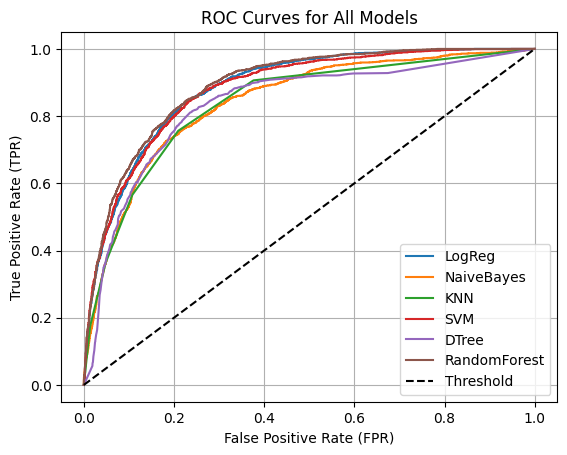

In [448]:
for model, (fpr, tpr) in results_for_plot.items():
    plt.plot(fpr, tpr, label=f"{model}")

# Plot the random line for no-skill classifier
plt.plot([0, 1], [0, 1], 'k--', label="Threshold")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for All Models")
plt.legend()
plt.grid(True)
plt.show()

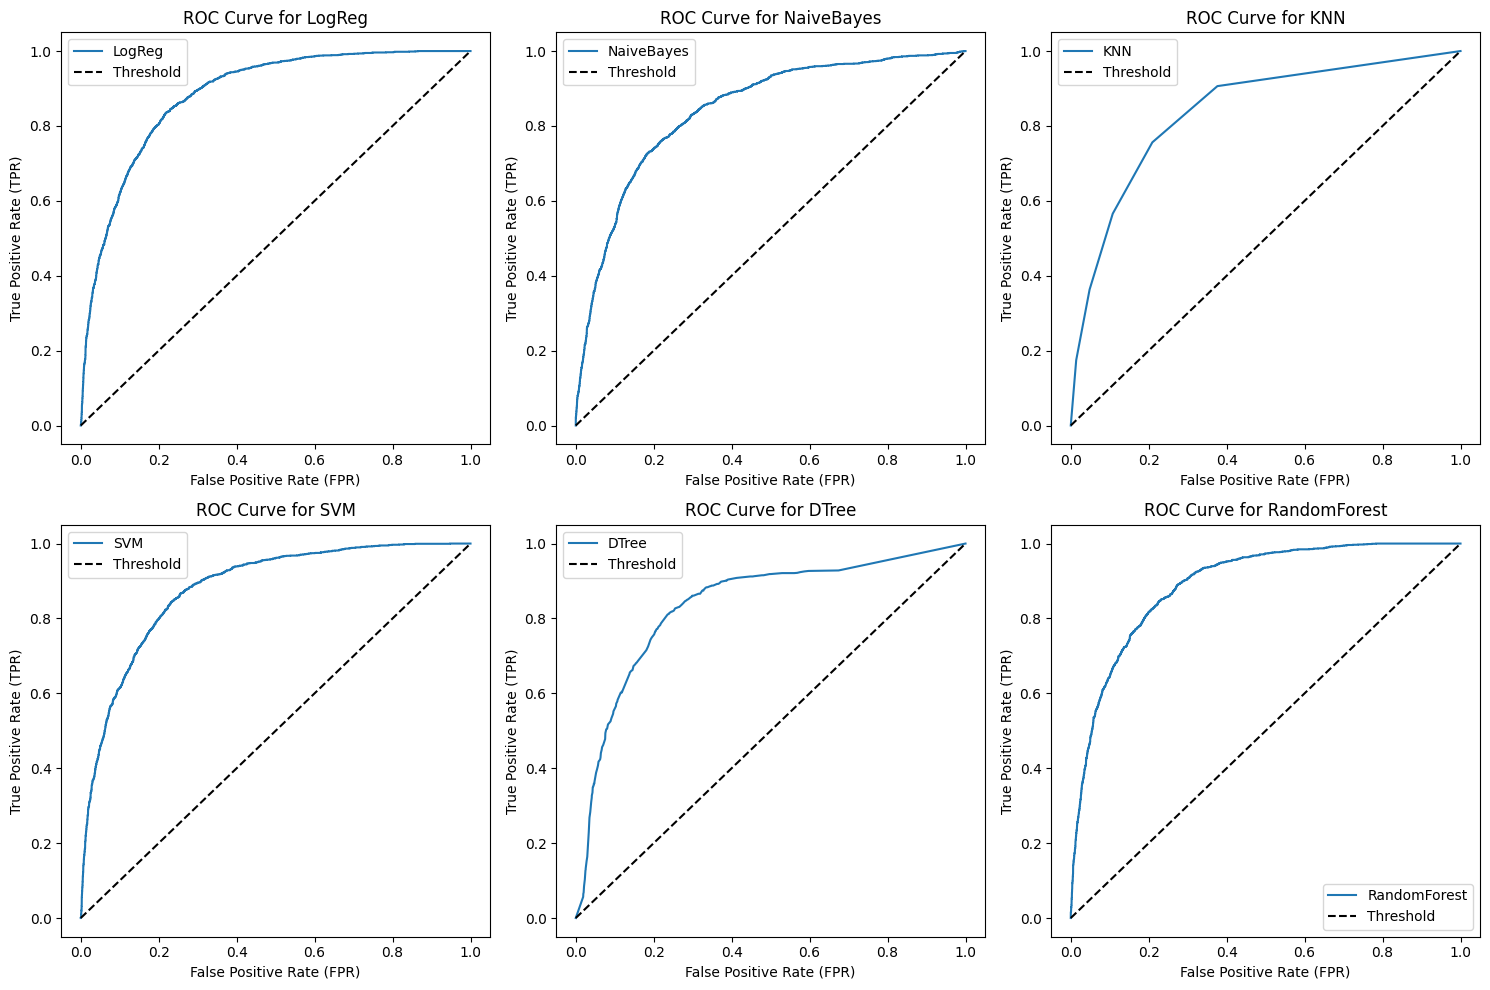

In [444]:
fig,axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes = axes.flatten()
for i,(model, (fpr, tpr)) in enumerate(results_for_plot.items()):
    axes[i].plot(fpr, tpr, label = f"{model}")
    axes[i].plot([0,1], [0,1], 'k--', label="Threshold")
    axes[i].set_title(f"ROC Curve for {model}")
    axes[i].set_ylabel("True Positive Rate (TPR)")
    axes[i].set_xlabel("False Positive Rate (FPR)")
    axes[i].legend()
plt.tight_layout()
plt.show()

### Summary

According to the results, Random Forest has the best metrics for classification.